# **Example 1:: Apply DBSCAN clustering algorithm on below data and let's choose  eps=0.6, min points=4**

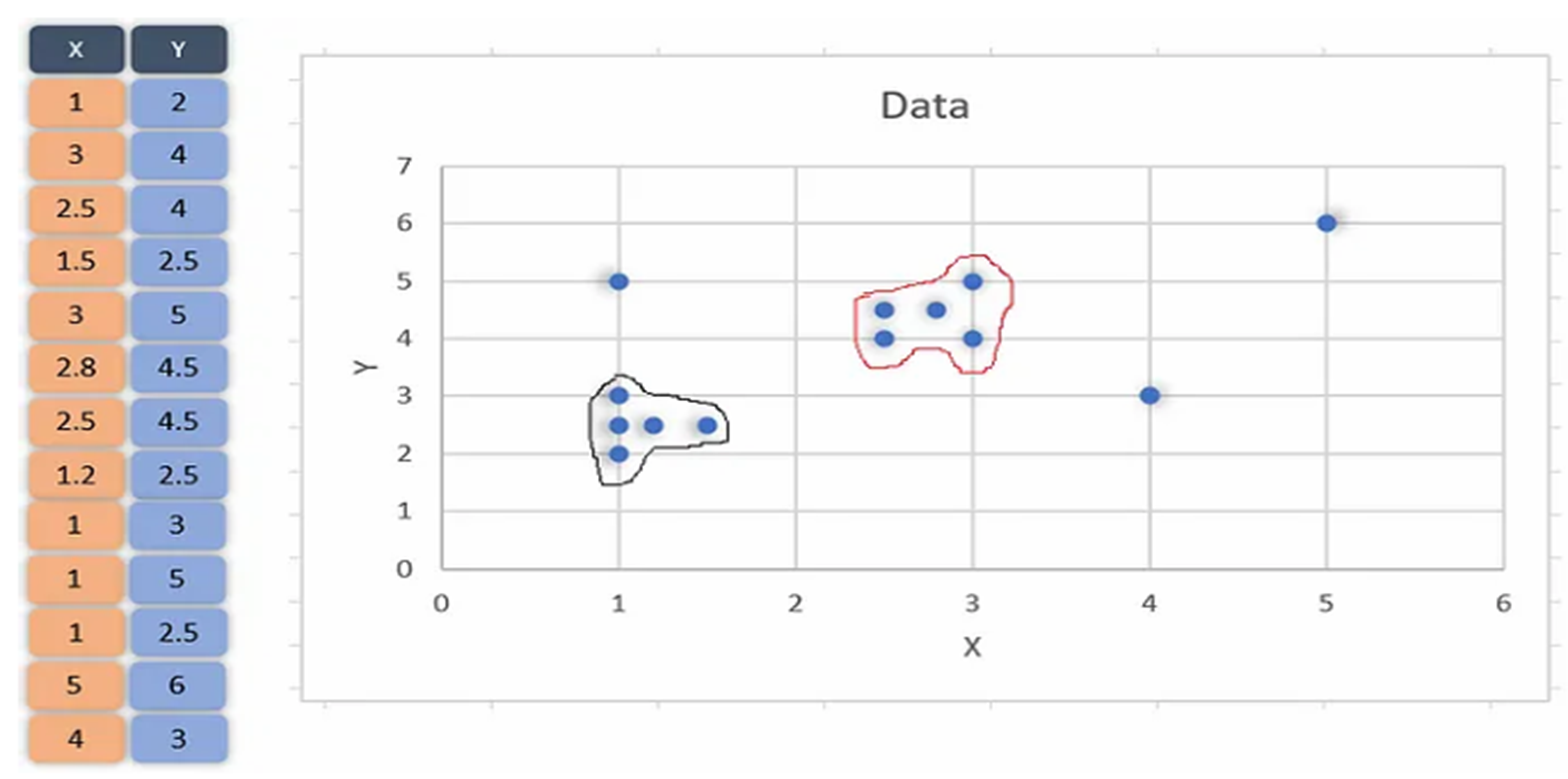

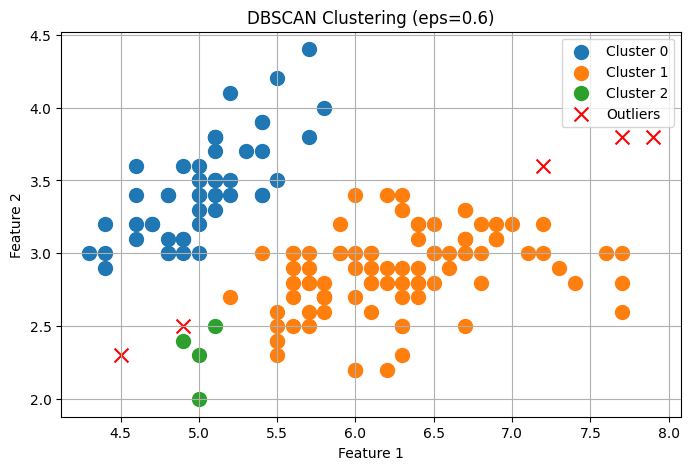

Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Parameters for DBSCAN
eps = 0.6
min_samples = 4

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = db.labels_

# Plotting
plt.figure(figsize=(8, 5))

# Plot each cluster
for k in set(labels):
    if k == -1:
        plt.scatter(X.iloc[labels == k, 0], X.iloc[labels == k, 1], c='r', s=100, label='Outliers', marker='x')
    else:
        plt.scatter(X.iloc[labels == k, 0], X.iloc[labels == k, 1], s=100, label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering (eps={eps})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Output results
print(f"Cluster labels: {labels}")


# **Example 2:: Apply DBSCAN clustering algorithm on below data and eps=1.9, min points=4**

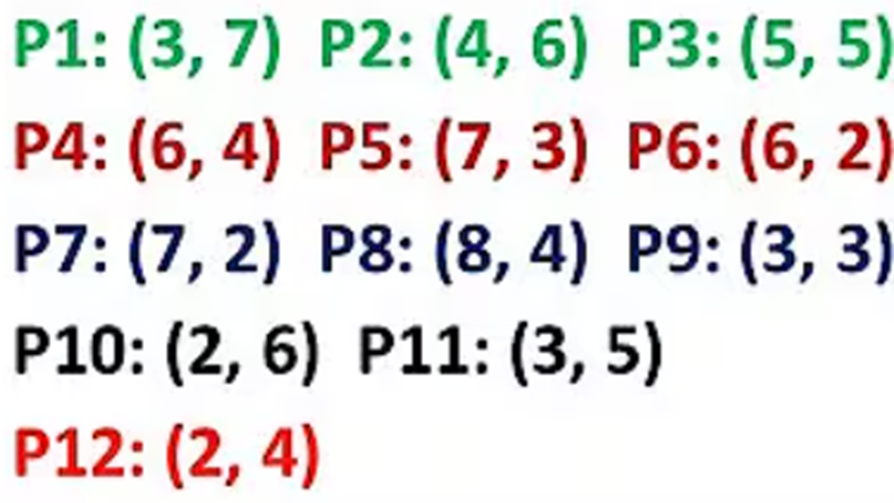

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

# Sample data points: includes core, border, and outlier points
data = np.array([
    [1, 2],   # Core point
    [2, 2],   # Core point
    [2, 3],   # Core point
    [1, 3],   # Border point
    [8, 7],   # Core point
    [8, 8],   # Core point
    [7, 8],   # Border point
    [25, 80], # Outlier
    [1, 0],   # Border point
    [0, 1]    # Border point
])

# DBSCAN parameters
eps = 1.5       # Maximum distance for two points to be in the same cluster
min_samples = 2 # Minimum number of points to form a core point

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
labels = db.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Output results
print("Cluster labels:", labels)
print("Core points:")
print(data[core_samples_mask])
print("Border points:")
print(data[(labels != -1) & ~core_samples_mask])
print("Outliers:")
print(data[labels == -1])

Cluster labels: [ 0  0  0  0  1  1  1 -1  0  0]
Core points:
[[1 2]
 [2 2]
 [2 3]
 [1 3]
 [8 7]
 [8 8]
 [7 8]
 [1 0]
 [0 1]]
Border points:
[]
Outliers:
[[25 80]]
